In [8]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei')
plt.rcParams['axes.grid'] = False

#from IPython.display import SVG
def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

Chapter 9 Convolutional Networks
================================

Convolution is a specialized kind of linear operation.

### 9.1 The Convolution Operation

\begin{align}
    s(t) &= \int x(a) w(t-a) \mathrm{d}a \\
         &= (x \ast w)(t)
\end{align}
where $x$ is the input, $w$ is the kernel, and $s(t)$ is referred to as the feature map.

Since convolution is commutative,

\begin{align}
    S(i, j) &= (I \ast K)(i, j) &= \sum_m \sum_n I(m, n) K(i - m, j - n) \\
            &= (K \ast I)(i, j) &= \sum_m \sum_n I(i - m, j - n) K(m, n)
\end{align}

Many machine learning libraries implement cross-correlation but call it convolution.

Discrete convolution can be viewed as multiplication by a matrix.

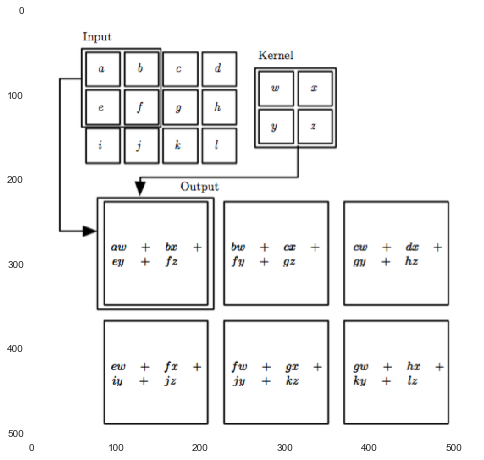

In [5]:
show_image("fig9_1.png", figsize=(8, 8))

### 9.2 Motivation

Convolution leverages three important ideas:

+ sparse interactions: fewer parameters
+ parameter sharing: tied weights
+ equivariant representations:     
  a function $f(x)$ is equivariant to a funtion $g$ if $f(g(x)) = g(f(x))$.

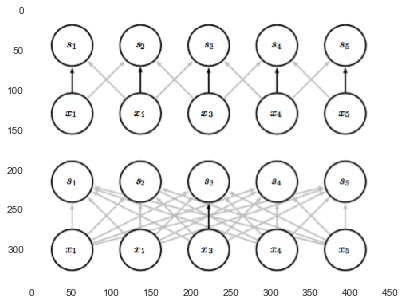

In [9]:
show_image("fig9_5.png", figsize=(8, 5))

### 9.3 Pooling

A pooling function replaces the output of the new at a certain location with a summary statistic of the nearby outputs.

popular pooling functions:

+ max
+ average
+ L2 norm
+ weighted average

strong prior: function must be invariant to small translations.

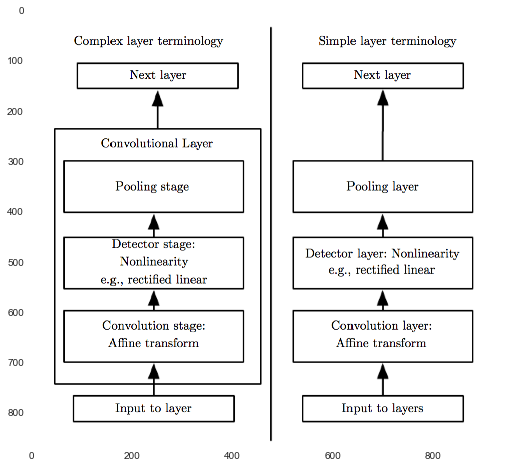

In [10]:
show_image("fig9_7.png", figsize=(10, 8))

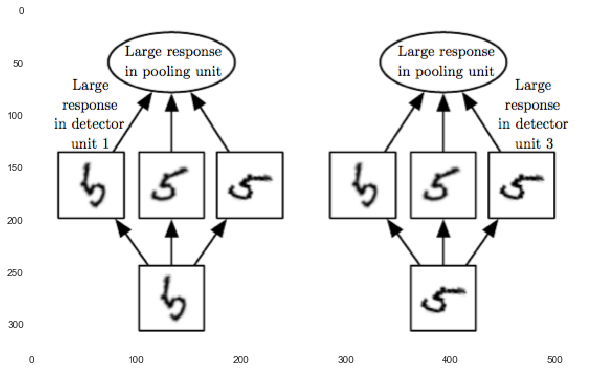

In [11]:
show_image("fig9_9.png", figsize=(10, 8))

### 9.4 Convolution and Pooling as an Infinitely Strong Prior

Prior: weak or strong <== how concentrated the probability density in the prior is.

We can image a convolutional net as being similar to a fully connected net, but with an infinitely strong prior over its weights: the weights for one hidden unit must be identical to the weights of its neighbor, but shifted in space.

convolution and pooling can cause underfitting.

### 9.5 Variants of the Basic Convolution Function

4-D tensors: (batch_size, height, width, channels)

Three zero-padding:

+ valid convolution: m - k +1 = m - (k - 1)
+ same convolution: m，补零至核中心
+ full convolution: m + k - 1，补零至核边角

see [details below](https://cn.mathworks.com/help/matlab/ref/conv2.html).

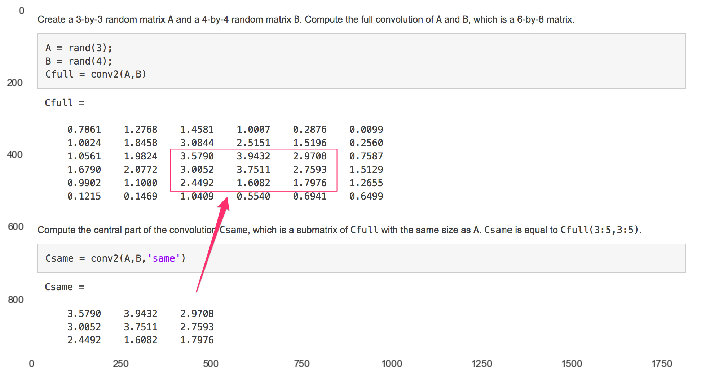

In [14]:
show_image("matlab_conv_2d.png", figsize=(12, 8))

convolutional layers $\to$ tiled convolution $\to$ locally connected layer

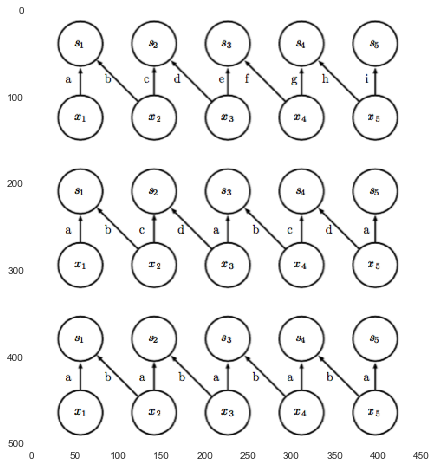

In [15]:
show_image("fig9_16.png", figsize=(10, 8))

compute gradients: See Goodfellow (2010) for a full derivation of the equations in the fully general multi-dimensional, multi-example case.

### 9.6 Structured Outputs